In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

%matplotlib inline

import xgboost

In [2]:
hist_data = pd.read_csv('historical_user_logs.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
test_data.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [4]:
train_data.tail()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463290,45023,2017-07-07 23:59,1113780,C,405490,60305,3,NaN,5.0,Male,5.0,3.0,4.0,0,0


In [5]:
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])

In [6]:
train_data['Date'] = [d.weekday() for d in train_data['DateTime']]

In [7]:
train_data['Time'] = [d.time() for d in train_data['DateTime']]

In [8]:
train_data['Hour'] = [d.hour for d in train_data['DateTime']]

In [9]:
train_data['Minutes'] = [d.minute for d in train_data['DateTime']]
train_data['Seconds'] = [d.second for d in train_data['DateTime']]

In [10]:
train_data['Minutes'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

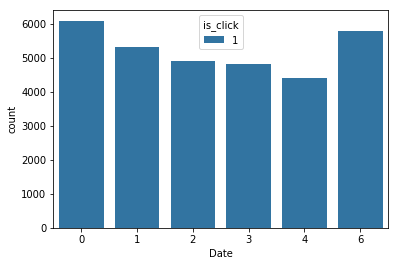

In [11]:
figsize = [20, 18]
sns.countplot(train_data[train_data['is_click']==1]['Date'], hue=train_data[train_data['is_click']==1]['is_click'])

In [12]:
df = train_data[np.isfinite(train_data['user_group_id'])]

In [13]:
X = df.loc[:, df.columns != 'is_click']
Y = df['is_click']

In [14]:
X = X.drop(['session_id', 'DateTime', 'product_category_2', 'city_development_index', 'Seconds', 'Minutes', 'Time'], axis=1)

In [15]:
X['Hour'] = X['Hour'].astype(str)

In [16]:
X = pd.get_dummies(X, drop_first=True)

In [17]:
X.columns

Index(['user_id', 'campaign_id', 'webpage_id', 'product_category_1',
       'user_group_id', 'age_level', 'user_depth', 'var_1', 'Date',
       'product_B', 'product_C', 'product_D', 'product_E', 'product_F',
       'product_G', 'product_H', 'product_I', 'product_J', 'gender_Male',
       'Hour_1', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_2',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9'],
      dtype='object')

In [18]:
xgb = xgboost.XGBClassifier()

In [19]:
xgb.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])
test_data['Date'] = [d.weekday() for d in test_data['DateTime']]
test_data['Time'] = [d.time() for d in test_data['DateTime']]
test_data['Hour'] = [d.hour for d in test_data['DateTime']]
test_data['Minutes'] = [d.minute for d in test_data['DateTime']]
test_data['Seconds'] = [d.second for d in test_data['DateTime']]

In [26]:
test_df = test_data.drop(['session_id', 'DateTime', 'product_category_2', 'city_development_index', 'Seconds', 'Minutes', 'Time'], axis=1)

In [27]:
test_df['Hour'] = test_df['Hour'].astype(str)

In [28]:
test_df = pd.get_dummies(test_df, drop_first=True)

In [29]:
y_pred = xgb.predict_proba(test_df)

In [30]:
submission = pd.DataFrame()
submission['session_id'] = test_data['session_id']
submission['is_click'] = y_pred[:,1]

In [31]:
submission.to_csv('submission_02.csv', index=False)